In [7]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np

# create a database connection to the SQLite database specified by db_file
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn

In [8]:
# create the connection
conn = create_connection("./R_UMD.db")

# make dataframes from each table in the SQLite database
df_user = pd.read_sql("SELECT * FROM User", conn)
df_user_sub = pd.read_sql("SELECT * FROM UserSubreddits", conn)
df_post = pd.read_sql("SELECT * FROM Post", conn)
df_comment = pd.read_sql("SELECT * FROM Comment", conn)

# close connection -- no longer needed
conn.close()

In [20]:
# try and find all bots (usernames end with 'bot')
df_bot = df_user_sub[df_user_sub['name'].str.endswith("bot")]
gb = df_bot.groupby('name')    
gb = [gb.get_group(x) for x in gb.groups]

# remove any row from df_user_sub if it's from a bot
for name in gb :
    df_user_sub = df_user_sub[df_user_sub.name != str(name['name'].reset_index(drop=True)[0])]

In [21]:
(df_user_sub['subreddit'].value_counts()/df_user_sub['subreddit'].count())[:10]*100

AskReddit          5.885303
UMD                4.662440
nfl                1.628522
politics           1.414040
pics               1.122952
funny              1.118109
nba                1.047700
leagueoflegends    0.849648
CFB                0.816370
soccer             0.751794
Name: subreddit, dtype: float64

In [58]:
gb = df_user_sub.groupby('name')    
gb = [gb.get_group(x) for x in gb.groups]

l = list()
names = list()

for name in gb :
    try :
        l.append([str(name['name'].reset_index(drop=True)[0]), (name[name.subreddit == 'UMD']['subreddit'].value_counts()/name['subreddit'].count())[0]])
    except :
        pass
        #l.append([str(name['name'].reset_index(drop=True)[0]), 0.0])

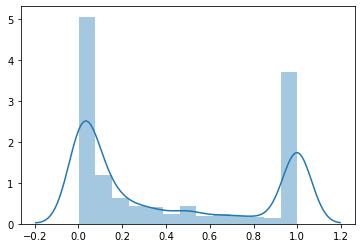

In [64]:
sns.distplot([row[1] for row in l])

In [67]:
first = 0
second = 0
third = 0
fourth = 0
total = 0

for name in gb :
    try :
        percentage = (name[name.subreddit == 'UMD']['subreddit'].value_counts()/name['subreddit'].count())[0]
    except :
        percentage = 0.0
    if (percentage < .25) :
        first = first + 1
    elif (percentage < .5) :
        second = second + 1
    elif (percentage < .74) :
        third = third + 1
    else :
        fourth = fourth + 1
    total = total + 1
    
first = first / total
second = second / total
third = third / total
fourth = fourth / total

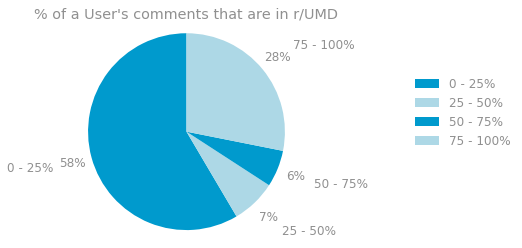

In [76]:
fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']
labels = ['0 - 25%', '25 - 50%', '50 - 75%', '75 - 100%']

ax.pie([first, second, third, fourth], labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=90,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("% of a User's comments that are in r/UMD")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

In [9]:
df_user_train = df_user.replace(to_replace='None', value=np.nan).replace(to_replace='', value=np.nan).dropna()
df_user_train['flair_clean'] = "unknown"

def flair_clean(flair) :
    flair = ''.join(i for i in flair if not i.isdigit())
    flair = flair.lower()
    
    stem = {"cs","computer science","comp sci","cmsc","kruskal","cmns","compsci","info sci","ischool","infosci", \
            "bchm","bio","chem","compe","ce","computer","compeng","comp","ee","aero","enae","enme","mech","meng", \
           "math","markov","phys","it support","phnb","aosc","gis","bsci","info","chbe","fire","inst","ae", \
           "network","premed","fpe","stem","ensp","enst","astro"," is", "civ","comsci","ents","mse", "stack", \
           "eng","stat","amsc","numer","web","matsci","cmps","psci","cbmg","cpe","astr","me ","mate","enfp", \
           "anatomy","bis","soft"}
    non_stem = {"econ","comm","journal","gvpt","government","policy","gov","criminal","ccjs","crim","bmgt", \
               "manage","market","business","kinesi","knes","psyc","ecology","sociology","socy","design","anthro", \
               "film","english","engl","arch","larc","philosophy","arhu","women","arec","anth","creative", "history", \
               "ansc","hist","plcy","amer","account","jour","geog","supply","art","geol","theatre","scm","agnr", \
               "music","social","lang","hort","public","ling","elem","arabic","hcim","nfsc","jap","fmsc","mph", \
               "ath","jd","fin","russian","germ","fam","agro","enology"}
    for major in stem :
        if (major in flair) :
            return "STEM"
    for major in non_stem :
        if (major in flair) :
            return "NON STEM"
    return "unknown"

for i, row in df_user_train.iterrows() :
    new = flair_clean(str(row['flair']))
    df_user_train.at[i, 'flair_clean'] = new
    
pd.set_option('display.max_rows', 100)
df_user_train

,name,flair,created_utc,flair_clean
2,TonyChen616,:MTestudo: Comp Sci 22,1.574035e+09,STEM
3,Shalleycat,'20 Community Health,1.574032e+09,NON STEM
30,Vu004,info sci,1.573964e+09,STEM
37,xuhu55,:MTestudo: cs,1.573937e+09,STEM
38,kahootmusicfor10hour,:MTestudo:,1.573934e+09,unknown
47,Seyi777,'20 CS,1.573925e+09,STEM
48,Krazy4jk,BCHM,1.573924e+09,STEM
50,JerrryQ,:MTestudo:CS '20,1.573923e+09,STEM
59,isaiah2439,:MTestudo:,1.573866e+09,unknown
60,nillawiffer,:MTestudo: CS,1.573856e+09,STEM


In [16]:
l_stem = list()
l_non_stem = list()

for i, i_row in df_user_train[df_user_train.flair_clean == "STEM"].iterrows() :
    for j, j_row in df_post[df_post.name == i_row["name"]].iterrows() :
        l_stem.append(j_row['title'])
    #for j, j_row in df_comment[df_comment.name == i_row["name"]].iterrows() :
    #    l_stem.append(j_row['body'])
    if (i % 100 == 0) :
        print(i)
        
for i, i_row in df_user_train[df_user_train.flair_clean == "NON STEM"].iterrows() :
    for j, j_row in df_post[df_post.name == i_row["name"]].iterrows() :
        l_non_stem.append(j_row['title'])
    #for j, j_row in df_comment[df_comment.name == i_row["name"]].iterrows() :
    #    l_non_stem.append(j_row['body'])
    if (i % 100 == 0) :
        print(i)

2700
4000
10600
9900
11800


In [17]:
l_non_stem_clean = [(l.split(),'NON_STEM') for l in l_non_stem]
l_stem_clean = [(l.split(),'STEM') for l in l_stem]

documents = l_non_stem_clean + l_stem_clean
random.shuffle(documents)
sys.getsizeof(documents)

48128

In [15]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [19]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [21]:
nltk.classify.accuracy(classifier, train_set)

0.8392010832769127

In [12]:
from nltk.corpus import movie_reviews
import random
documentsss = [(list(movie_reviews.words(fileid)), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
len(documentsss)

2000

In [3]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [18]:
import sys
sys.getsizeof(documentsss)

16560

In [13]:
len(documents)

86988